In [5]:
import numpy as np

In [6]:
N_x, N_y = 800, 600
a_p = 310.3
y0, y1 = 205, 371

In [7]:
X_ind, Y_ind = np.indices((N_x,N_y))

In [8]:
img = np.exp(-np.square(0.01*(X_ind-a_p))) * (np.exp(-np.square((0.01*(Y_ind-y0)))))

In [9]:
import matplotlib.pyplot as plt

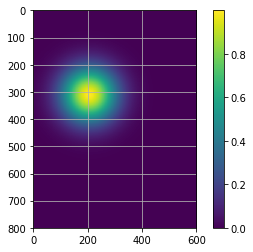

In [10]:
fig, ax = plt.subplots()
mat = ax.imshow(img)
cb = fig.colorbar(mat, ax=ax)

# image

In [124]:
a_guess = 400
d = 75
y0 = 245 + 30

In [125]:
img_index = 1
fpath = "C:/Users/ahn/Downloads/ToSeongjin/ToSeongjin/images/delay_{:03d}.txt".format(img_index)
# fpath = " /mnt/c/Users/ahn/Downloads/ToSeongjin/ToSeongjin/images/delay_{:03d}.txt".format(img_index)

In [126]:
from os.path import exists

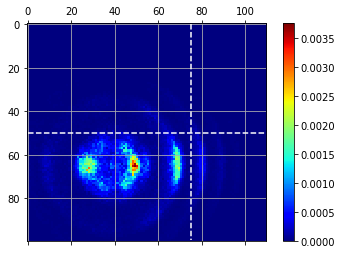

In [127]:
figm, axm = plt.subplots()
img = np.loadtxt(fpath)
mat = axm.matshow(img[350:450,200:310], cmap='jet')
axm.plot((0,310-200-1),(a_guess-350,a_guess-350),'--w')
axm.plot((y0-200,y0-200),(0,450-350-1),'--w')
cb = figm.colorbar(mat, ax=axm)

# [TODO] Just calc the mean! directly!

# DO!

In [128]:
a_arr = np.arange(a_guess-d,a_guess+d+1)

In [163]:
delta_x = 5

A = img[a_arr+delta_x,y0] - img[a_arr-delta_x,y0]

In [164]:
Asum = np.empty_like(A)
Asum[0] = A[0]
for i in range(A.size-1): Asum[i+1] = Asum[i] + A[i+1]

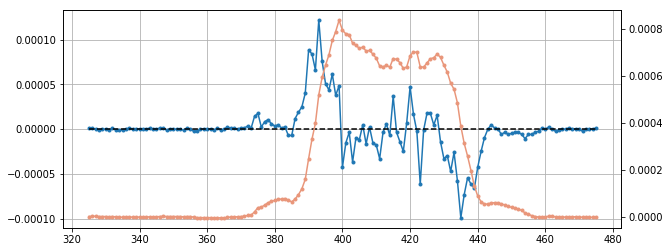

In [165]:
figa, axa = plt.subplots(figsize=(10,4))
# axa.semilogy(a_arr, A)
axa.plot(a_arr, A, '.-')
axa.plot(a_arr[[0,-1]],[0,0], color='black', linestyle='--')

axaa = axa.twinx()
axaa.grid(False)
axaa.plot(a_arr, Asum, '.-', color='darksalmon')

In [173]:
Asum_mean = (Asum * a_arr).sum() / Asum.sum()
Asum_mean

412.88970597221817

In [166]:
Asum_max_ind_arr, = np.where(Asum == Asum.max())

In [167]:
assert Asum_max_ind_arr.shape == (1,)
Asum_max_ind = Asum_max_ind_arr[0]
Asum_max_ind

74

In [168]:
a_arr[Asum_max_ind]

399

In [ ]:
np.where

In [69]:
# figa.savefig("A-test-on-vmi-img.png")